# Write a Python Program for morphological boundary detection and Morphological smoothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
!wget -O lena_binary.png "https://drive.google.com/uc?export=download&id=1XVRigJmJMWnCYdRkA4zxJcly4XBSblw9"

--2024-04-30 01:12:32--  https://drive.google.com/uc?export=download&id=1XVRigJmJMWnCYdRkA4zxJcly4XBSblw9
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving drive.google.com (drive.google.com)... 142.250.182.238, 2404:6800:4009:81f::200e
Connecting to drive.google.com (drive.google.com)|142.250.182.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XVRigJmJMWnCYdRkA4zxJcly4XBSblw9&export=download [following]
--2024-04-30 01:12:32--  https://drive.usercontent.google.com/download?id=1XVRigJmJMWnCYdRkA4zxJcly4XBSblw9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.27.193, 2404:6800:4009:800::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.27.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218593 (213K) [image/png]
Saving to: ‘lena_binary.png’

lena_binary.png     100%[==

In [2]:
# Read the image
image_path = "lena_binary.png"  # Replace with image name
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [3]:
def morphological_boundary_detection(image):
    # Apply morphological boundary detection
    erosion = cv2.erode(image, np.ones((3,3),np.uint8),iterations = 1)
    boundary = cv2.absdiff(image, erosion)
    return boundary

def morphological_smoothing(image):
    # Apply morphological smoothing
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))
    return closing

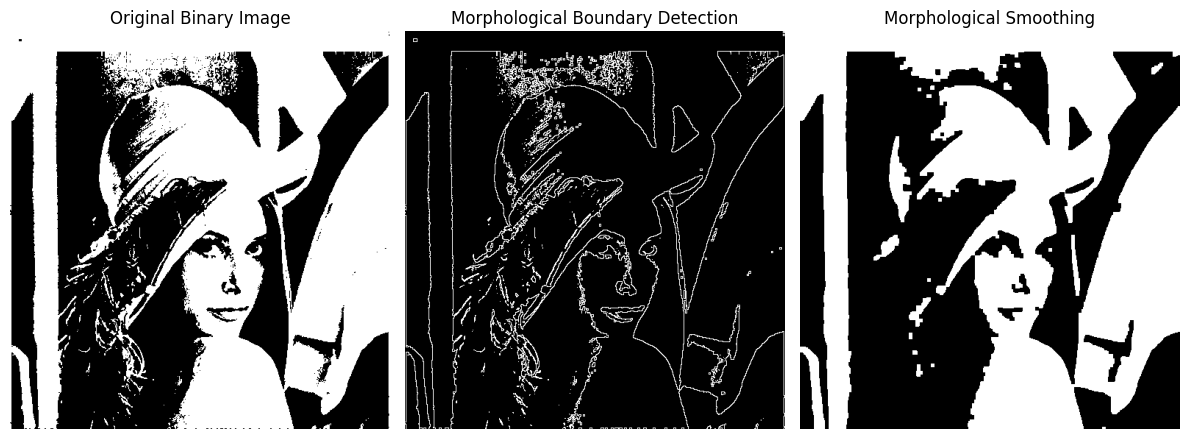

In [4]:
# Check if the image has been successfully loaded
if binary_image is None:
    print("Error: Could not read the image.")
else:
    # Binarize the image (convert to binary)
    _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

    # Apply morphological boundary detection
    boundary_image = morphological_boundary_detection(binary_image)

    # Apply morphological smoothing
    smoothed_image = morphological_smoothing(binary_image)

    # Display the original, boundary-detected, and smoothed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Original Binary Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(boundary_image, cmap='gray')
    plt.title('Morphological Boundary Detection')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title('Morphological Smoothing')
    plt.axis('off')

    plt.tight_layout()
    plt.show()